In [1]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("../Datasets/FISH-long.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,4000.0,4000.0,4000.0,4000.0,3481.111816,0.0
1,2017-01-03,3900.0,5000.0,3900.0,4800.0,4177.333984,3200.0
2,2017-01-04,4800.0,4800.0,4800.0,4800.0,4177.333984,0.0
3,2017-01-05,4800.0,4800.0,4800.0,4800.0,4177.333984,0.0
4,2017-01-06,4800.0,4800.0,4800.0,4800.0,4177.333984,0.0
...,...,...,...,...,...,...,...
1257,2021-12-24,7400.0,7400.0,7400.0,7400.0,7400.000000,200.0
1258,2021-12-27,7650.0,7650.0,7650.0,7650.0,7650.000000,200.0
1259,2021-12-28,7650.0,7650.0,7650.0,7650.0,7650.000000,100.0
1260,2021-12-29,7650.0,7650.0,7650.0,7650.0,7650.000000,100.0


In [3]:
df = df[["Close"]].copy()

In [4]:
df.describe()

,Close
count,1261.000000
mean,3513.517050
std,1679.724828
min,1760.000000
25%,2620.000000
50%,3000.000000
75%,3680.000000
max,14050.000000


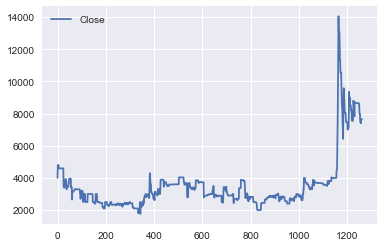

In [5]:
df.plot()
plt.show()

# Check Correlation and Autocorrelation

## ACF (AutoCorrelation Function)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


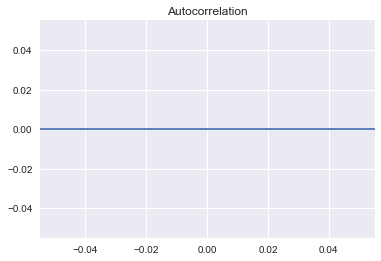

In [7]:
plot_acf(df, lags=6)
plt.show()

## PACF (Partial AutoCorrelation Function)

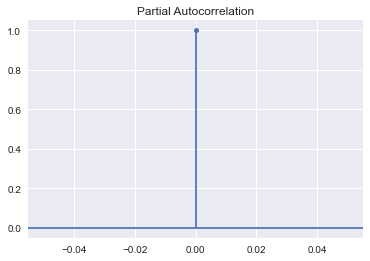

In [8]:
plot_pacf(df, lags=6)
plt.show()

 ## Train Test Split

In [9]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]


In [10]:
print(len(train))
print(len(test))

1009
253


## Training ARIMA model

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
model = ARIMA(train, order=(1,1,1))
result = model.fit(disp=2)

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MissingDataError: exog contains inf or nans

In [14]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.048
Method:                       css-mle   S.D. of innovations            225.595
Date:                Fri, 06 May 2022   AIC                            678.096
Time:                        21:28:09   BIC                            685.663
Sample:                             1   HQIC                           680.967
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0093     34.449      0.000      1.000     -67.509      67.528
ar.L1.D.Close     0.1532      2.218      0.069      0.945      -4.194       4.501
ma.L1.D.Close    -0.1016      2.229     

In [19]:
forecasts = model.forecast(4).tolist()
test_values = test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)


AttributeError: 'ARIMA' object has no attribute 'forecast'